# Assumption: Equal variance of errors - residuals are consistent accross predictions

- Equal variance is known as **homoskedasticity** and non-equal variance is **heteroskedasticity** 


# Diagnosis: Residual Plots
**Cone shape (<)** along the x-axis that is the indication of heteroskedasticity

# Solution : Apply log transform on the target
This also solves non-normality of errors

In [7]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [2]:
diamonds = pd.read_csv('../Course Materials/Data/Diamonds Prices2022.csv')

In [4]:
diamonds['carat_sq'] = diamonds['carat']**2

In [9]:
diamonds =  diamonds.sample(300)

In [10]:
features =[
    'carat',
    'carat_sq', 
    'depth',
    'table',
    'x'
]
X = sm.add_constant(diamonds.loc[:, features])
y = diamonds['price']

model = sm.OLS(y, X).fit()

<Axes: ylabel='None'>

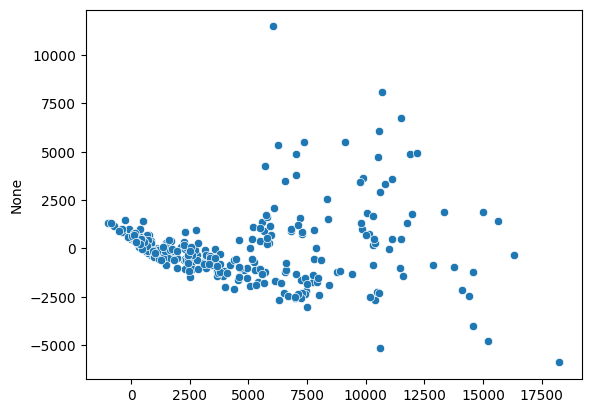

In [11]:
sns.scatterplot(x = model.predict(), y = model.resid)

<Axes: ylabel='None'>

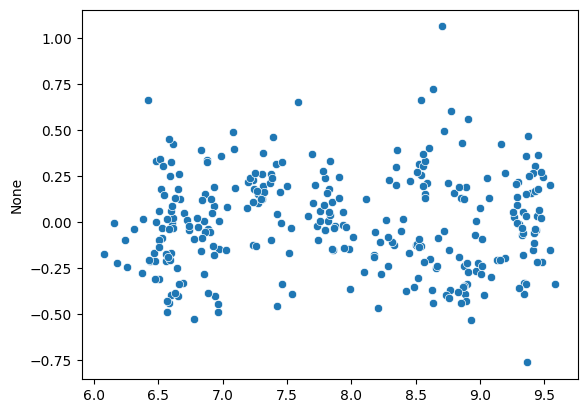

In [12]:
# the plot shows violation
X = sm.add_constant(diamonds.loc[:, features])
y = np.log(diamonds['price'])

model = sm.OLS(y, X).fit()
sns.scatterplot(x =model.predict(), y = model.resid)